In [32]:
import numpy as np
import mpmath as mpm

from tqdm.auto import tqdm
from functools import partial
import matplotlib.pyplot as plt

# to find roots
from mpmath import findroot
from scipy.optimize import fsolve

###Circle:  
End points of all lines $y=ax$ with $arclength=r$ originating from center $c$ 
<br>
<br>
Arclength of a line $ax$ from $0$ to $c$:  
$$ arclen(ax) = \int_{0}^{c} \sqrt{1 + \left (\frac{d(ax)}{dx} \right) ^2 } dx $$  
$$ = \int_{0}^{c} \sqrt{1 + a^2} \hspace{0.2 cm} dx$$  
$$ = \left [x \sqrt{1+a^2} \right ]_{0}^{c} $$  
$$ = c \sqrt{1+a^2} $$

Circle obeys the equation  
$arclen(ax) = r$  
$=> c = \frac{r}{\sqrt{1+a^2}}$  

So the line $y=ax$ should extend from $0$ to $\frac{r}{\sqrt{1+a^2}}$

In [33]:
def plot_circle(func, solver, vals, lbl_func=None, full_circle=False):
  if not lbl_func: lbl_func = lambda a: None

  plt.gca().set_aspect('equal')

  xs, ys = [], []
  for a in vals:
    c = solver(a)

    x = np.linspace(0,c,100)
    y = func(a,x)
    xs.append(x[-1]) #c
    ys.append(y[-1]) #a(c**2)

    # quarter to semicircle
    x = np.concatenate((-x[::-1], x))
    y = np.concatenate((y[::-1], y))

    plt.plot(x, y, label=lbl_func(a))
    if full_circle:
      plt.plot(x, -y)

  # quarter to semicircle
  xs.extend(-np.array(xs)[::-1])
  ys.extend(ys[::-1])
  if full_circle:
    xs.extend(xs[::-1])
    ys.extend(-np.array(ys[::-1]))
    # add the first point at the end again
    xs.append(xs[0])
    ys.append(ys[0])

  plt.plot(xs,ys)

  # plot circle
  circle = plt.Circle((0, 0), 1, fill=False)
  plt.gca().add_patch(circle)
  if not full_circle:
    plt.ylim(0)
    plt.legend()

###Quadratic Circle:  
End points of all lines $y=ax^2$ with $arclength=r$ 
<br>
<br>
Arclength of simple quadratic $ax^2$ from $0$ to $c$:  
$$ arclen(ax^2) = \int_{0}^{c} \sqrt{1 + \left (\frac{d(ax^2)}{dx} \right) ^2 } dx $$  
$$ = \int_{0}^{c} \sqrt{1 + 4 a^2 x^2} \hspace{0.2 cm} dx$$  
$$ = \left [\frac{2ax\sqrt{4a^2x^2+1} + sinh^{-1}(2ax)}{4a} \right ]_{0}^{c} $$  
$$ = \frac{2ac\sqrt{4a^2c^2+1} + sinh^{-1}(2ac)}{4a} $$


Quadratic circle obeys the equation  
$arclen(ax^2) = r$  
or alternatively  
the roots of
$arclen(ax^2) - r$

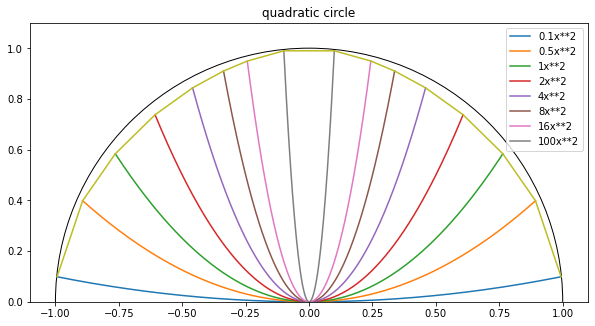

In [34]:
vals = [0.1,0.5,1,2,4,8,16,100]
func = lambda a,x: a*(x**2)
lbl_func = lambda a: f'{a}x**2'

def solver(a):
  def integral(a,x):
    t = 2*a*x
    x = (t*np.sqrt(1+t**2) + np.arcsinh(t)) / (4*a)
    return x

  # arclength from 0 to c
  def arclen(a,c):
    x0 = integral(a,0)
    xc = integral(a,c)
    x = xc - x0   # x0 can be ignored as it equals 0
    return x - 1   # subtract 1 to have arclen equal to 1

  return fsolve(partial(arclen, a), 1)

fig, axs = plt.subplots(figsize=(10,10))
plot_circle(func, solver, vals, lbl_func)
plt.title('quadratic circle')
plt.show()

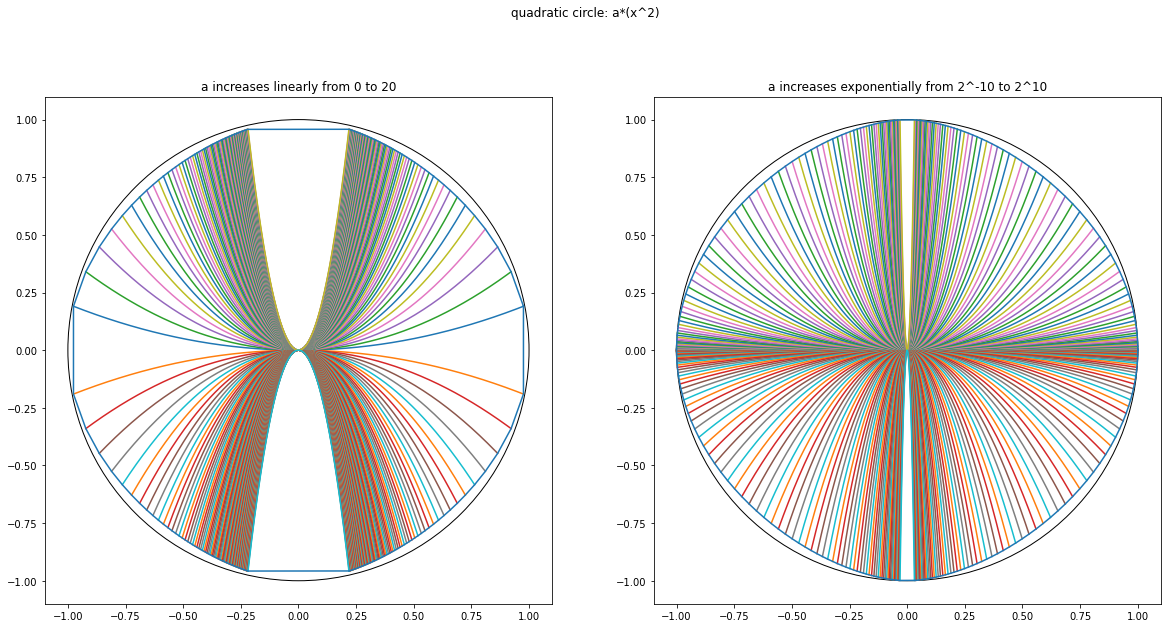

In [35]:
fig, axs = plt.subplots(1,2, figsize=(20,10))
plt.suptitle('quadratic circle: a*(x^2)')

plt.axes(axs[0])
vals = np.linspace(0,20, 101)[1:]
plot_circle(func, solver, vals, full_circle=True)
plt.title('a increases linearly from 0 to 20')

plt.axes(axs[1])
vals = 2**np.linspace(-10,10, 100)
plot_circle(func, solver, vals, full_circle=True)
plt.title(f'a increases exponentially from 2^-10 to 2^10')

plt.show()

###Exponential Circle:  
End points of all lines $y=e^{ax}$ with $arclength=r$ 
<br>
<br>
Arclength of simple Exponential $e^{ax}$ from $0$ to $c$:  
$$ arclen(e^{ax}) = \int_{0}^{c} \sqrt{1 + \left (\frac{d(e^{ax})}{dx} \right) ^2 } dx $$  
$$ = \int_{0}^{c} \sqrt{1 + a^2 e^{2ax}} \hspace{0.2 cm} dx$$  
$$ = \left [\frac{\sqrt{a^2 e^{2ax}+1} 
- tanh^{-1}(\sqrt{a^2 e^{2ax}+1})}{a} \right ]_{0}^{c} $$  
  
$$ = \left( \frac{\sqrt{a^2 e^{2ac}+1} 
- tanh^{-1}(\sqrt{a^2 e^{2ac}+1})}{a}  \right )
- \left( \frac{\sqrt{a^2+1} 
- tanh^{-1}(\sqrt{a^2+1})}{a}  \right )
$$


Exponential circle obeys the equation  
$arclen(e^{ax}) = r$  
or alternatively  
the roots of
$arclen(e^{ax}) - r$

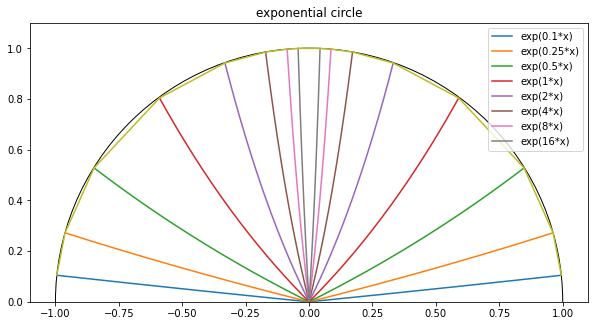

In [36]:
vals = [0.1,0.25,0.5,1,2,4,8,16]
func = lambda a,x: np.exp(a*x) - 1
lbl_func = lambda a: f'exp({a}*x)'

def solver(a):
  def integral(a,x):
    t = mpm.sqrt((a**2) * mpm.exp(2*a*x) + 1)
    x = (t - mpm.atanh(t))/a
    return x

  # arclength from 0 to c
  def arclen(c,a=a):
    x0 = integral(a,0)
    xc = integral(a,c)
    x = xc - x0
    return x - 1  # subtract 1 to have arclen equal to 1

  return float(findroot(arclen, (0,1)).real)

plt.subplots(figsize=(10,10))
plot_circle(func, solver, vals, lbl_func)
plt.title('exponential circle')
plt.show()

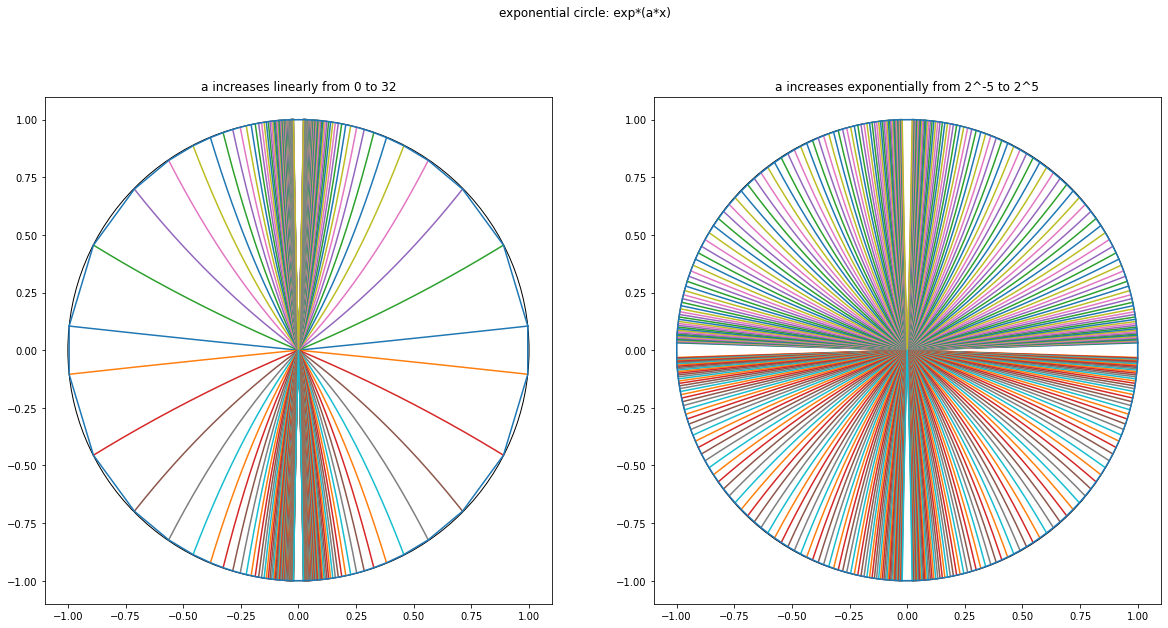

In [37]:
fig, axs = plt.subplots(1,2, figsize=(20,10))
plt.suptitle('exponential circle: exp*(a*x)')

plt.axes(axs[0])
vals = np.linspace(0.1,32, 100)
plot_circle(func, solver, vals, full_circle=True)
plt.title('a increases linearly from 0 to 32')

plt.axes(axs[1])
vals = 2**np.linspace(-5,5, 100)
plot_circle(func, solver, vals, full_circle=True)
plt.title(f'a increases exponentially from 2^-5 to 2^5')

plt.show()

###Logarithmic Circle:  
End points of all lines $y=alog(x+1)$ with $arclength=r$ 
<br>
<br>
Arclength of simple Exponential $alog(x+1)$ from $0$ to $c$:  
$$ arclen(alog(x+1)) = \int_{0}^{c} \sqrt{1 + \left (\frac{d(alog(x+1))}{dx} \right) ^2 } dx $$  
$$ = \int_{0}^{c} \sqrt{1 + \frac {a^2} {(x+1)^2}} \hspace{0.2 cm} dx$$  

$$ = \left [(x+1) \sqrt{\frac{a^2}{(x+1)^2}+1}
- a sinh^{-1} \left( \frac{a}{x+1} \right) \right]_{0}^{c} $$  
  
$$ = \left((c+1) \sqrt{\frac{a^2}{(c+1)^2}+1}
- a sinh^{-1} \left( \frac{a}{c+1} \right) \right)
- \left( \sqrt{a^2+1} - a sinh^{-1} (a) \right) $$


Logarithmic circle obeys the equation  
$arclen(alog(x+1)) = r$  
or alternatively  
the roots of
$arclen(alog(x+1)) - r$

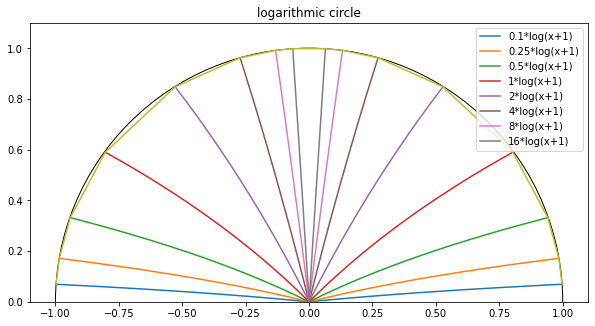

In [38]:
vals = [0.1,0.25,0.5,1,2,4,8,16]
func = lambda a,x: a*np.log(x+1)
lbl_func = lambda a: f'{a}*log(x+1)'

def solver(a):
  def integral(a, x):
    t = a/(x+1)
    x = (x+1)*mpm.sqrt(1 + t**2) - a*mpm.asinh(t)
    return x
  
  # arclength from 0 to c
  def arclen(c,a=a):
    x0 = integral(a,0)
    xc = integral(a,c)
    x = xc - x0
    return x - 1  # subtract 1 to have arclen equal to 1

  return float(findroot(arclen, (0,1)))

plt.subplots(figsize=(10,10))
plot_circle(func, solver, vals, lbl_func)
plt.title('logarithmic circle')
plt.show()

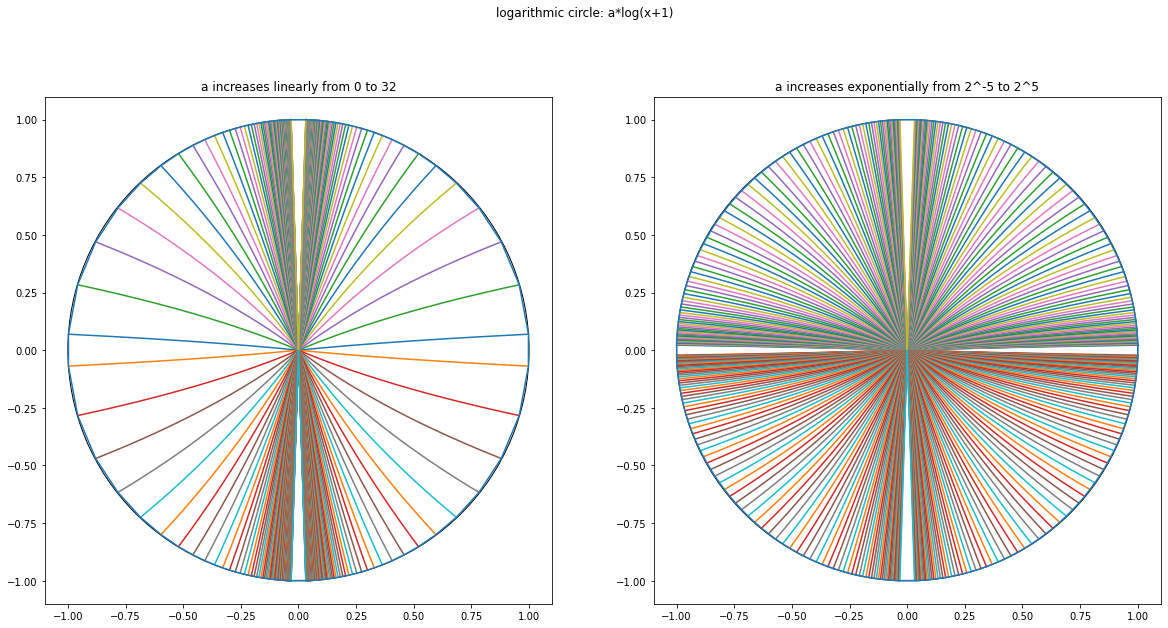

In [39]:
fig, axs = plt.subplots(1,2, figsize=(20,10))
plt.suptitle('logarithmic circle: a*log(x+1)')

plt.axes(axs[0])
vals = np.linspace(0.1,32, 100)
plot_circle(func, solver, vals, full_circle=True)
plt.title('a increases linearly from 0 to 32')

plt.axes(axs[1])
vals = 2**np.linspace(-5,5, 100)
plot_circle(func, solver, vals, full_circle=True)
plt.title(f'a increases exponentially from 2^-5 to 2^5')

plt.show()

###Square Root Circle:  
End points of all lines $y=a\sqrt{x}$ with $arclength=r$ 
<br>
<br>
Arclength of simple sqrt $a\sqrt{x}$ from $0$ to $c$:  
$$ arclen(a\sqrt{x}) = \int_{0}^{c} \sqrt{1 + \left (\frac{d(a\sqrt{x})}{dx} \right) ^2 } dx $$  
$$ = \int_{0}^{c} \sqrt{1 + \frac {a^2} {4x}} \hspace{0.2 cm} dx$$  

$$ = \left [x \sqrt{\frac{a^2}{4x}+1}
+ \frac{1}{4} a^2 tanh^{-1} \left( \sqrt{\frac{a^2}{4x}+1} \right) \right]_{0}^{c} $$  
  
this integral is undefined at zero, so we pick a very small value $\epsilon$  

$$ = \left ( c \sqrt{\frac{a^2}{4c}+1}
+ \frac{1}{4} a^2 tanh^{-1} \left( \sqrt{\frac{a^2}{4c}+1} \right) \right) -
\left( \epsilon \sqrt{\frac{a^2}{4\epsilon}+1}
+ \frac{1}{4} a^2 tanh^{-1} \left( \sqrt{\frac{a^2}{4\epsilon}+1} \right) \right) $$


Sqrt circle obeys the equation  
$arclen(a\sqrt{x}) = r$  
or alternatively  
the roots of
$arclen(a\sqrt{x}) - r$

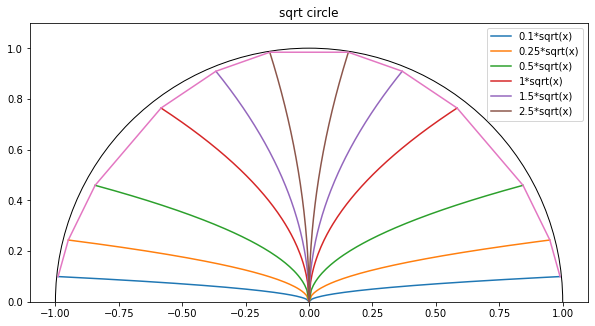

In [40]:
vals = [0.1,0.25,0.5,1,1.5,2.5]
func = lambda a,x: a*(x**0.5)
lbl_func = lambda a: f'{a}*sqrt(x)'

def solver(a):
  def integral(a, x):
    t = mpm.sqrt((a**2)/(4*x) + 1)
    x = x*t + .25*(a**2)*mpm.atanh(t)
    return x
  
  # arclength from 0 to c
  def arclen(c,a=a):
    x0 = integral(a,1e-15)
    xc = integral(a,c)
    x = xc - x0
    return x - 1  # subtract 1 to have arclen equal to 1

  return float(findroot(arclen, 0.001, solver='newton').real)

fig, axs = plt.subplots(figsize=(10,10))
plot_circle(func, solver, vals, lbl_func)
plt.title('sqrt circle')
plt.show()

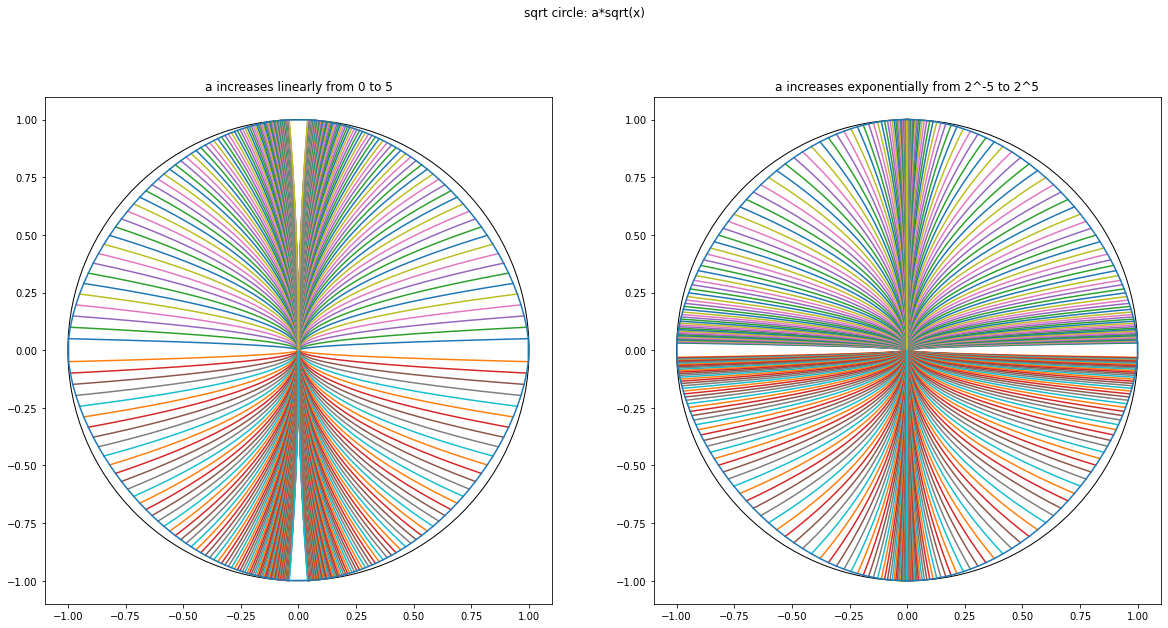

In [41]:
fig, axs = plt.subplots(1,2, figsize=(20,10))
plt.suptitle('sqrt circle: a*sqrt(x)')

plt.axes(axs[0])
vals = np.linspace(0,5, 101)[1:]
plot_circle(func, solver, vals, full_circle=True)
plt.title('a increases linearly from 0 to 5')

plt.axes(axs[1])
vals = 2**np.linspace(-5,5, 100)
plot_circle(func, solver, vals, full_circle=True)
plt.title(f'a increases exponentially from 2^-5 to 2^5')

plt.show()

###Power Circle:  
End points of all lines $y=x^a$ with $arclength=r$ 
<br>
<br>
Arclength of simple sqrt $x^a$ from $0$ to $c$:  
$$ arclen(x^a) = \int_{0}^{c} \sqrt{1 + \left (\frac{d(x^a)}{dx} \right) ^2 } dx $$  
$$ = \int_{0}^{c} \sqrt{1 + a^2 x^{2a-2}} \hspace{0.2 cm} dx$$  

$$ = \left [ - \left (
\frac{ \sqrt{a^2 x^{2a} + x^2} 
\left ( (a-1)x^2 \sqrt{\frac{x^{2a-2}}{a^2} + 1} 
{_2}\textrm{F}_1 \left ( \frac{1}{2}, \frac{a-2}{2(a-1)}; \frac{4-3a}{2(1-a)}; -\frac{x^{2a-2}}{a^2} \right )
- (a-2) (a^2 x^{2a} + x^2)
\right ) }
{(a-2) a (a^2 x^{2a} + x^2)} \right )
\right]_{0}^{c} $$  

$$ = \left [
\frac{  \sqrt{a^2 x^{2a} + x^2} 
\left ( (a-2) (a^2 x^{2a} + x^2) - (1-a^{-1}) (x^{2-a}) \sqrt{a^2 x^{2a} + x^2}
{_2}\textrm{F}_1 \left ( \frac{1}{2}, \frac{a-2}{2(a-1)}; \frac{4-3a}{2(1-a)}; -\frac{x^{2a-2}}{a^2} \right ) \right ) }
{(a-2) a (a^2 x^{2a} + x^2)}
\right]_{0}^{c} $$

$$ = \left [
\frac{ \left ( (a-2) a \sqrt{a^2 x^{2a} + x^2} - (a-1) (x^{2-a})
{_2}\textrm{F}_1 \left ( \frac{1}{2}, \frac{a-2}{2(a-1)}; \frac{3a-4}{2(a-1)}; -\frac{x^{2a-2}}{a^2} \right ) \right ) }
{(a-2) a^2 }
\right]_{0}^{c} $$
<br>

Power circle obeys the equation  
$arclen(x^a) = r$  
or alternatively  
the roots of
$arclen(x^a) - r$

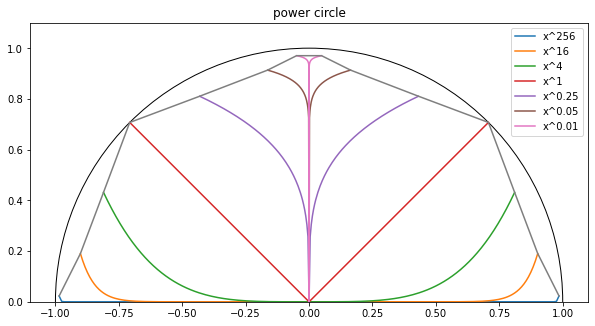

In [54]:
from mpmath import hyp2f1

vals = [256, 16, 4, 1, 0.25, 0.05, 0.01]
func = lambda a,x: x**a
lbl_func = lambda a: f'x^{a}'

def solver(a):
  # hypergeometric function fails for a = 1 and 2
  if a == 1:
    return np.cos(np.pi/4)
  elif a == 2:
    return 0.763927

  def integral(a, x):
    t = mpm.sqrt((a*(x**a))**2 + x**2)
    t1 = a*(a-2)
    F = hyp2f1( 0.5, (a-2)/(2*(a-1)), (3*a-4)/(2*(a-1)), - ((mpm.power(x, 1-a))/a)**2 )
    x = (t1*t - (a-1)*mpm.power(x, (2-a))*F) / (a*t1)

    # t = (a*(x**a))**2 + x**2
    # t1 = t**0.5
    # t2 = (a-1) * (x**2) * mpm.sqrt( ((mpm.power(x, 1-a))/a)**2 + 1 )
    # F = hyp2f1( 0.5, (a-2)/(2*(a-1)), (4-3*a)/(2*(1-a)), - ((mpm.power(x, 1-a))/a)**2 )
    # t3 = (a-2) * t
    # x = - ( t1 * (t2*F - t3) ) / (a*t3)
    return x
  
  # arclength from 0 to c
  def arclen(c,a=a):
    xc = integral(a,c)
    if a > 1:
      x0 = integral(a,1e-15)
      x = xc - x0
    else:
      x = xc
    return x - 1  # subtract 1 to have arclen equal to 1

  return float(findroot(arclen, a/(1+a), solver='newton'))

fig, axs = plt.subplots(figsize=(10,10))
plot_circle(func, solver, vals, lbl_func)
plt.title('power circle')
plt.show()

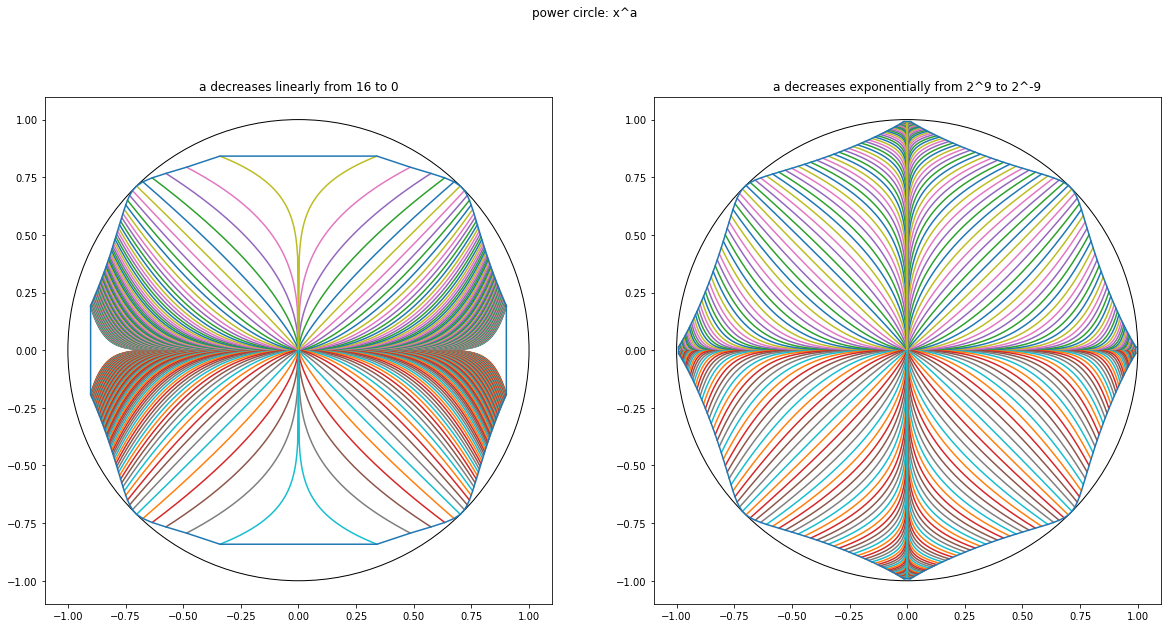

In [48]:
fig, axs = plt.subplots(1,2, figsize=(20,10))
plt.suptitle('power circle: x^a')

plt.axes(axs[0])
vals = np.linspace(16,0, 101)[:-1]
plot_circle(func, solver, vals, full_circle=True)
plt.title('a decreases linearly from 16 to 0')

plt.axes(axs[1])
vals = 2**np.linspace(9,-9, 100)
plot_circle(func, solver, vals, full_circle=True)
plt.title(f'a decreases exponentially from 2^9 to 2^-9')

plt.show()